# Factor Analysis

In this notebook I use factor analysis to re-derive the 5 personality factors. I then attempt to use factor analysis to split each of the five factors into 2 sub-factors.

### Imports

In [8]:
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages')
sys.path.append('/usr/local/lib/python3.8/site-packages')

In [9]:
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

### Re-Derive 5 Factors

In [27]:
# load preprocessed data from notebook 1
df = pd.read_csv('answers.csv')
df.head()

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,4.0,4.0,5.0,4.0,5.0,5.0,4.0,3.0,5.0,5.0,...,4.0,5.0,3.0,5.0,5.0,5.0,4.0,2.0,5.0,5.0
1,2.0,4.0,3.0,3.0,3.0,3.0,1.0,1.0,1.0,1.0,...,3.0,3.0,3.0,3.0,2.0,3.0,3.0,1.0,3.0,2.0
2,5.0,5.0,1.0,2.0,5.0,5.0,1.0,1.0,5.0,5.0,...,4.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
3,2.0,1.0,2.0,2.0,3.0,2.0,3.0,2.0,4.0,1.0,...,4.0,3.0,5.0,4.0,4.0,4.0,5.0,2.0,5.0,5.0
4,3.0,5.0,3.0,3.0,3.0,5.0,3.0,5.0,3.0,1.0,...,3.0,5.0,1.0,5.0,3.0,5.0,3.0,1.0,5.0,3.0


In [13]:
# check if the variables correlate to one another
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value
# p value is 0, the variables correlate to one another, so we can proceed with factor analysis

(363504.68168251665, 0.0)

In [28]:
# use kmo test to estimate the proportion of variance among all observed variables
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
kmo_model
# kmo is ~0.91, much higher than the 0.6 threshold necessary for factor analysis

0.9098527205592912

In [17]:
fa = FactorAnalyzer()
fa.fit(df)
eigen_values, vectors = fa.get_eigenvalues()

In [18]:
eigen_values

array([8.04368078, 4.61658805, 3.75732945, 3.54946071, 2.76318086,
       1.57228661, 1.33295958, 1.04982648, 0.96754539, 0.92504509,
       0.89668953, 0.86743883, 0.84405461, 0.80165305, 0.78780038,
       0.7345542 , 0.7299833 , 0.7191908 , 0.68124246, 0.66255998,
       0.65761061, 0.63521361, 0.61196536, 0.59020821, 0.58289613,
       0.56839695, 0.55386387, 0.53415723, 0.52304043, 0.51082848,
       0.50186238, 0.49207834, 0.48801932, 0.48228838, 0.44871097,
       0.44750701, 0.43548609, 0.42078905, 0.41562808, 0.40416363,
       0.39743042, 0.38009036, 0.37363276, 0.36406004, 0.34778225,
       0.3444921 , 0.32659334, 0.32370478, 0.31288441, 0.22154527])

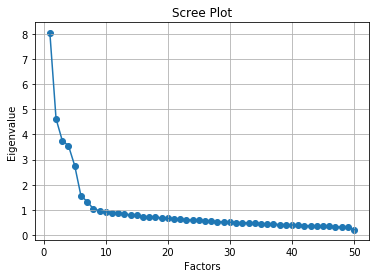

In [19]:
plt.scatter(range(1,df.shape[1]+1),eigen_values)
plt.plot(range(1,df.shape[1]+1),eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [20]:
fa.set_params(n_factors=5, rotation='varimax')
fa.fit(df)
loadings = fa.loadings_

In [25]:
factors = pd.DataFrame(fa.loadings_)

In [29]:
factors.index = df.columns

In [30]:
factors

,0,1,2,3,4
E1,0.670818,-0.057000,0.063001,0.009939,0.039399
E2,0.677190,-0.006166,0.124880,-0.026324,0.039215
E3,0.650941,-0.257557,0.260238,0.132085,-0.011409
E4,0.702360,-0.154994,0.059151,0.022633,0.008337
E5,0.724849,-0.079054,0.218392,0.100636,0.073757
E6,0.564150,-0.091957,0.158520,0.027091,0.221946
E7,0.729161,-0.102579,0.163066,0.046657,0.033981
E8,0.562941,-0.035126,-0.036482,-0.064014,0.031491
E9,0.618161,-0.044801,-0.008879,-0.008945,0.115618
E10,0.642179,-0.186051,0.062528,0.023013,0.024532
